# Analytics Report on the Premier League Teams' Performance of the "Top Six" 

## Background

In the past decade, the modern English Premier League ("EPL") has been largely dominated by six major football clubs referred to as the "Top 6"[https://www.straitstimes.com/sport/football/football-whats-next-for-the-english-premier-leagues-top-six]: Manchester United, Manchester City, Arsenal, Liverpool, Chelsea and Tottenham. Out of the six clubs, this proposal seeks to delve deeper into the performances of Man United, Man City and Liverpool, all of which have undergone substantial managerial changes during this period. Through this exercise, the proposal seeks to answer the following questions before discussing possible directions for investigation.

### Description of Dataset

The dataset file "stats.csv" was downloaded from Kaggle [https://www.kaggle.com/zaeemnalla/premier-league]. It is a performance overview of all teams that have played in the EPL over the course of 12 seasons (August 2006- May 2018). The file's rows are ordered as such: the first 20 rows are EPL teams for the 2006-2007 season, the following 20 are ranks for the 2007-2008 season, so on and so forth. The teams are __not__ necessarily ordered based on end of season rankings; as such, the capstone will include any discrepancies between the actual outcomes and its findings in summary statistics. A team that has avoided relegation for all 12 seasons would therefore appear 12 times. The dataset's columns include important metrics not limited to: goals conceded, total cross and big chances missed. The proposal assesses these metrics to determine ones that are most relevant to answering the questions listed above. An overview of the dataset, including its dimensions and measures of variance, are highlighted below. 

### Research Questions

a) What makes the "Top Six" the best six teams?  

b) How has the new ownership of Manchester City FC affected its overall seasonal performance? 

c) Over the course of 10 seasons, Liverpool FC has had five different managerial turnovers. What caused the turnovers?

### Setting Up the Code

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
%matplotlib inline
df = pd.read_csv ('stats.csv')

In [19]:
#removes columns with missing elements
counter_nan=df.isnull().sum()
counter_without_nan=counter_nan[counter_nan==0]
df=df[counter_without_nan.keys()]

In [20]:
df.shape

(240, 36)

In [21]:
#the code above removed 6 of 42 columns which were not being used in the capstone project

In [22]:
df.head(22)

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_pass,total_long_balls,total_cross,corner_taken,touches,clearance_off_line,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,18723.0,2397.0,918.0,258.0,25686.0,1.0,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,16759.0,2270.0,897.0,231.0,24010.0,2.0,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,17154.0,2800.0,1107.0,282.0,24150.0,1.0,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,18458.0,2045.0,873.0,278.0,25592.0,1.0,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,14914.0,2408.0,796.0,181.0,22200.0,2.0,0.0,51.0,24.0,2006-2007
5,Bolton Wanderers,16.0,14.0,47.0,84.0,4.0,404.0,120.0,7.0,10.0,...,12400.0,2403.0,942.0,217.0,18932.0,6.0,2.0,44.0,21.0,2006-2007
6,Reading,16.0,15.0,52.0,38.0,3.0,419.0,132.0,8.0,15.0,...,11232.0,2378.0,1067.0,280.0,18017.0,2.0,0.0,63.0,21.0,2006-2007
7,Blackburn Rovers,15.0,16.0,52.0,77.0,6.0,478.0,155.0,5.0,12.0,...,14033.0,2544.0,911.0,205.0,20812.0,8.0,5.0,56.0,25.0,2006-2007
8,Everton,15.0,10.0,52.0,65.0,2.0,465.0,153.0,9.0,9.0,...,12274.0,2288.0,867.0,208.0,19250.0,2.0,1.0,83.0,15.0,2006-2007
9,Portsmouth,14.0,12.0,45.0,48.0,1.0,525.0,186.0,9.0,13.0,...,12616.0,2276.0,783.0,247.0,19377.0,4.0,2.0,79.0,30.0,2006-2007


In [23]:
df.describe()
#Certain columns, such as big_chance_missed and dispossessed, are missing data from earlier seasons. 

,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,att_pen_goal,...,pen_goals_conceded,total_pass,total_long_balls,total_cross,corner_taken,touches,clearance_off_line,penalty_save,total_high_claim,punches
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,14.150000,14.150000,51.062500,61.079167,2.862500,514.241667,168.116667,12.283333,9.016667,3.650000,...,3.650000,15691.908333,2286.150000,831.370833,207.191667,23908.962500,4.991667,0.837500,54.920833,22.783333
std,6.022482,5.596846,16.203474,10.078249,1.802442,95.979164,38.748882,4.820950,3.659077,2.052246,...,1.930378,3176.276737,295.618128,118.551756,35.933177,3247.161627,2.804646,0.947718,18.780999,9.148869
min,1.000000,2.000000,20.000000,38.000000,0.000000,338.000000,94.000000,4.000000,1.000000,0.000000,...,0.000000,9478.000000,1462.000000,572.000000,136.000000,16772.000000,0.000000,0.000000,19.000000,4.000000
25%,10.000000,10.000000,40.000000,54.000000,1.000000,441.000000,140.000000,9.000000,6.000000,2.000000,...,2.000000,13379.750000,2070.000000,749.000000,180.000000,21577.000000,3.000000,0.000000,40.000000,17.000000
50%,12.000000,15.000000,47.000000,60.500000,3.000000,498.500000,158.500000,11.500000,9.000000,3.500000,...,3.000000,14937.000000,2276.500000,818.000000,201.000000,23168.500000,5.000000,1.000000,53.000000,22.000000
75%,18.000000,19.000000,61.000000,67.000000,4.000000,572.000000,194.250000,15.000000,12.000000,5.000000,...,5.000000,18250.250000,2470.500000,911.250000,230.000000,26294.000000,7.000000,1.000000,68.000000,27.000000
max,32.000000,29.000000,106.000000,94.000000,9.000000,834.000000,288.000000,33.000000,18.000000,11.000000,...,11.000000,28241.000000,3176.000000,1156.000000,309.000000,35130.000000,16.000000,5.000000,118.000000,66.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 36 columns):
team                    240 non-null object
wins                    240 non-null float64
losses                  240 non-null float64
goals                   240 non-null float64
total_yel_card          240 non-null float64
total_red_card          240 non-null float64
total_scoring_att       240 non-null float64
ontarget_scoring_att    240 non-null float64
hit_woodwork            240 non-null float64
att_hd_goal             240 non-null float64
att_pen_goal            240 non-null float64
att_freekick_goal       240 non-null float64
att_ibox_goal           240 non-null float64
att_obox_goal           240 non-null float64
goal_fastbreak          240 non-null float64
total_offside           240 non-null float64
clean_sheet             240 non-null float64
goals_conceded          240 non-null float64
outfielder_block        240 non-null float64
interception            240 non-null floa

## Are the "Top Six" really the League's best six teams?

To compute the Top Six-performing teams numerically, this capstone will be calculating the teams' "win and draw percentages". The metric - __(wins+(38-(losses+wins)/total games played__ - will represent the number of games a team won or drew in a given season. Within the EPL, 20 teams accumulate points over a season of 38 games, both home and away. A team gains 3 points with a win, 1 point with a draw, and 0 points with a loss. The team with the highest accumulated points wins the title. With this metric, the proposal affirms that a successful team should end games with points, be it a draw or a win. The metric may misrepresent mid-table teams consistently staying afloat with draws instead of wins, but it is a reliable one for assessing the top tier teams - the proposal's sole focus. 

One thing to note: Draws (38-(losses+wins)) are also included in our metric because while rare, it is plausible for a team to have less wins than a contender but finish ahead of it due to points accumulated from draws.

### Case Study: Visualizing the Chosen Metrics for EPL Season 2016-2017 among the Top Six

To test the chosen metric, we will be evaluating the performances of both the Top Six and the rest of the league below:

In [25]:
df_sixteenseventeen=df[df.season=='2016-2017']
df_epl=df_sixteenseventeen[['team','wins','losses','season']].copy()
df_epl['win and draw percentage']=(df_epl.wins+(38-df_epl.losses-df_epl.wins))/38
df_epl

,team,wins,losses,season,win and draw percentage
200,Chelsea,30.0,5.0,2016-2017,0.868421
201,Tottenham Hotspur,26.0,4.0,2016-2017,0.894737
202,Arsenal,23.0,9.0,2016-2017,0.763158
203,Manchester City,23.0,6.0,2016-2017,0.842105
204,Liverpool,22.0,6.0,2016-2017,0.842105
205,Manchester United,18.0,5.0,2016-2017,0.868421
206,Everton,17.0,11.0,2016-2017,0.710526
207,AFC Bournemouth,12.0,16.0,2016-2017,0.578947
208,Crystal Palace,12.0,21.0,2016-2017,0.447368
209,Leicester City,12.0,18.0,2016-2017,0.526316


In [26]:
df_epltwo=df_epl.head(6).copy()
df_epltwo['win and draw percentage']=(df_epltwo.wins+(38-df_epltwo.losses-df_epltwo.wins))/38
df_epltwo

,team,wins,losses,season,win and draw percentage
200,Chelsea,30.0,5.0,2016-2017,0.868421
201,Tottenham Hotspur,26.0,4.0,2016-2017,0.894737
202,Arsenal,23.0,9.0,2016-2017,0.763158
203,Manchester City,23.0,6.0,2016-2017,0.842105
204,Liverpool,22.0,6.0,2016-2017,0.842105
205,Manchester United,18.0,5.0,2016-2017,0.868421


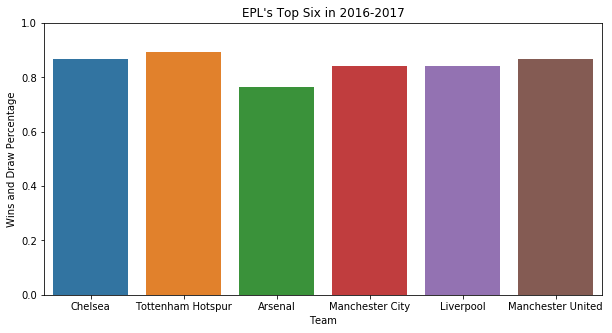

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df_epltwo[['team','win and draw percentage']], 
            x='team', y='win and draw percentage', 
            ax=ax)
plt.ylim([0,1])
plt.ylabel('Wins and Draw Percentage')
plt.xlabel('Team')
plt.title("EPL's Top Six in 2016-2017")
tick_val=[0,1,2,3,4,5]
tick_lab=['Chelsea','Tottenham Hotspur','Arsenal','Manchester City','Liverpool','Manchester United']
plt.xticks(tick_val, tick_lab)
plt.show()

In [28]:
df_epltwo['win and draw percentage'].describe()

count    6.000000
mean     0.846491
std      0.045326
min      0.763158
25%      0.842105
50%      0.855263
75%      0.868421
max      0.894737
Name: win and draw percentage, dtype: float64

It is clear from the graph that the Top Six teams have all performed on a high and similar level; the mean win and draw percentage stood at 0.84 in 2016-2017, with a small standard deviation of 0.04 indicating very little dispersion from the mean. 
We will now look at the win and draw percentage of these six teams in relation to the rest of the Premier League table: 

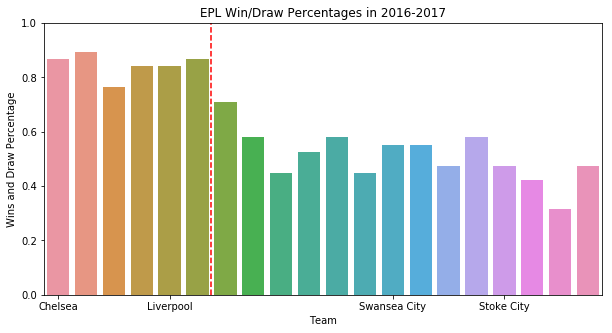

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df_epl[['team','win and draw percentage']], 
            x='team',y='win and draw percentage',
            ax=ax)
plt.axvline(x=5.5, color='red', linestyle='--')
plt.ylim([0,1])
plt.ylabel('Wins and Draw Percentage')
plt.xlabel('Team')
plt.title('EPL Win/Draw Percentages in 2016-2017')
tick_val=[0,4,12,16]
tick_lab=['Chelsea','Liverpool','Swansea City','Stoke City']
plt.xticks(tick_val, tick_lab)
plt.show()

In [30]:
df_epl['win and draw percentage'].describe()

count    20.000000
mean      0.610526
std       0.178196
min       0.315789
25%       0.473684
50%       0.565789
75%       0.782895
max       0.894737
Name: win and draw percentage, dtype: float64

The top six teams (to the left of line), performed at a noticeably higher level than the remaining 14 teams - with a mean win and draw percentage of 0.84 as opposed to the mean percentage for the whole table, 0.61. There are, however, shortcomings to this metric. In certain instances, such as Tottenham Hotspur's higher percentage than Chelsea, the metric does not accurately represent the year-end results of the season; Chelsea won the Premier League, not Tottenham Hotspur. Because it ended 15 games in draws, Manchester United had a higher percentage than Arsenal, although it finished behind the latter team. These discrepancies were anticipated at the beginning of the case study. However, the original question - whether the Top Six is really the top six - is answered by the graph and metric. 

## How has the new ownership of Manchester City FC affected its overall seasonal performance?

In [31]:
df_mancity=df[df.team=='Manchester City']
df_mancwins=df_mancity[['team','wins','losses','season']].copy()
df_mancwins['win and draw percentage']=(df_mancwins.wins+(38-df_mancwins.losses-df_mancwins.wins))/38
df_mancwins

,team,wins,losses,season,win and draw percentage
13,Manchester City,11.0,18.0,2006-2007,0.526316
28,Manchester City,15.0,13.0,2007-2008,0.657895
46,Manchester City,15.0,18.0,2008-2009,0.526316
65,Manchester City,18.0,7.0,2009-2010,0.815789
82,Manchester City,21.0,9.0,2010-2011,0.763158
100,Manchester City,28.0,5.0,2011-2012,0.868421
121,Manchester City,23.0,6.0,2012-2013,0.842105
140,Manchester City,27.0,6.0,2013-2014,0.842105
161,Manchester City,24.0,7.0,2014-2015,0.815789
182,Manchester City,19.0,10.0,2015-2016,0.736842


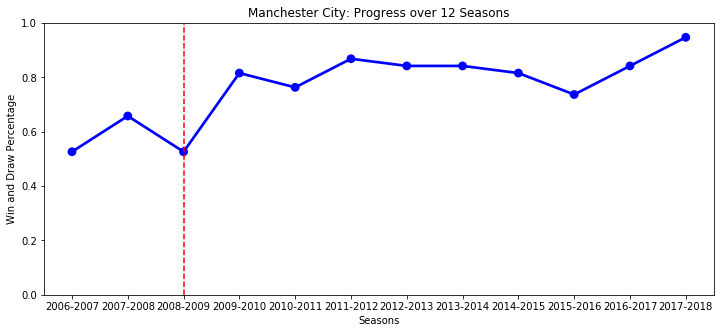

In [32]:
fig, ax = plt.subplots(figsize=(12,5))
sns.pointplot(data=df_mancwins[['season', 'win and draw percentage']],
              x='season',
              y='win and draw percentage',
              ax=ax,
              color='blue')

plt.ylim(0,1)
tick_val=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tick_lab=['2006-2007','2007-2008','2008-2009','2009-2010','2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016','2016-2017','2017-2018']
plt.xticks(tick_val, tick_lab)
plt.axvline(x=2, color='red', linestyle='--')
plt.title('Manchester City: Progress over 12 Seasons')
plt.ylabel('Win and Draw Percentage')
plt.xlabel('Seasons')
plt.show()

In [33]:
df_mancwins['win and draw percentage'].describe()

count    12.000000
mean      0.765351
std       0.132513
min       0.526316
25%       0.717105
50%       0.815789
75%       0.842105
max       0.947368
Name: win and draw percentage, dtype: float64

As demonstrated by the graph, Manchester City's team performance has markedly improved as a result of its new ownership; in at the start of 2008, Sheikh Mansour of the United Arab Emirates became the team's financier, ending the club's turbulent relationship with its previous owner, Thaksin Shinawatra. Its win dan draw percentage - which stood at 0.526 at the end of 2009, rose to 0.816 the following season. 

## Over the course of 10 seasons, Liverpool FC has had five different managerial turnovers. What caused the turnovers?

In [34]:
df_liv=df[df.team=='Liverpool']
df_livwins=df_liv[['team','wins','losses','season']].copy()
df_livwins['win and draw percentage']=(df_livwins.wins+(38-df_livwins.losses-df_livwins.wins))/38
df_livwins

,team,wins,losses,season,win and draw percentage
2,Liverpool,20.0,10.0,2006-2007,0.736842
23,Liverpool,21.0,4.0,2007-2008,0.894737
42,Liverpool,25.0,2.0,2008-2009,0.947368
64,Liverpool,18.0,11.0,2009-2010,0.710526
84,Liverpool,17.0,14.0,2010-2011,0.631579
108,Liverpool,14.0,14.0,2011-2012,0.631579
126,Liverpool,16.0,9.0,2012-2013,0.763158
141,Liverpool,26.0,6.0,2013-2014,0.842105
165,Liverpool,18.0,12.0,2014-2015,0.684211
186,Liverpool,16.0,10.0,2015-2016,0.736842


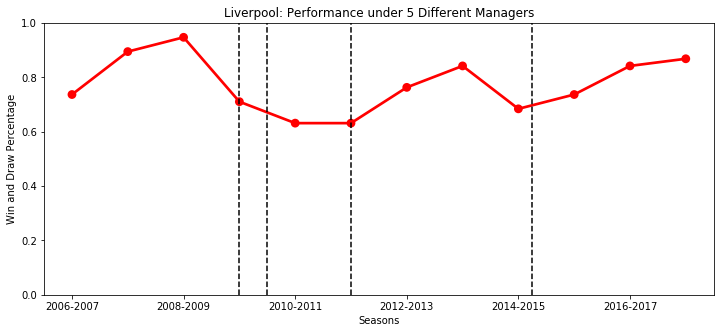

In [35]:
fig, ax = plt.subplots(figsize=(12,5))
sns.pointplot(data=df_livwins[['season', 'win and draw percentage']],
              x='season',
              y='win and draw percentage',
              ax=ax,
              color='red')

plt.ylim(0,1)
tick_val=[0, 2, 4, 6, 8, 10]
tick_lab=['2006-2007','2008-2009','2010-2011','2012-2013','2014-2015','2016-2017']
plt.xticks(tick_val, tick_lab)
plt.axvline(x=3, color='black', linestyle='--')
plt.axvline(x=3.5, color='black', linestyle='--')
plt.axvline(x=5, color='black', linestyle='--')
plt.axvline(x=8.25, color='black', linestyle='--')
plt.title('Liverpool: Performance under 5 Different Managers')
plt.ylabel('Win and Draw Percentage')
plt.xlabel('Seasons')
plt.show()

In [36]:
df_livwins['win and draw percentage'].describe()

count    12.000000
mean      0.774123
std       0.103732
min       0.631579
25%       0.703947
50%       0.750000
75%       0.848684
max       0.947368
Name: win and draw percentage, dtype: float64

The graph above shows Liverpool's league performances over 12 seasons under five different managers - __Rafael Benitez, Roy Hodgson, Kenny Dalglish, Brendan Rodgers, and Jurgen Klopp__ in that order. The lines represent the years the managers were sacked/appointed. As visualized by the graph, Liverpool's management has changed followed by sharp declines in win and draw percentages, as demonstrated by the departures of Rafael Benitez and Roy Hodgson, as well as a period of stangnant performance in the case of Kenny Dalglish.*

*External factors not computable by the chosen metric not limited to falling out of personal relationships, owner-manager conflicts, meltdowns, etc. may have contributed to Liverpool's frequent sackings in recent years. 

## Conclusion and Subsequent Steps

In this Capstone, we sought to __a)__ verify the on-paper performance of the "Top Six", __b)__ Manchester City's season performances with its new owner, and __c)__ the reasons for Liverpool's frequent managerial turnovers in recent years. Through visualizations and a carefully chosen metric, we've determined the following: 

__a)__ There is truth to the term Top Six based on the chosen metric, although said metric did not anticipate discrepancies between win and draw percentages and actual outcomes between teams within the Top Six.
__b)__ Under the ownership of Sheikh Mansour, Manchester City's performance visibly improved, and almost to immediate effect, jumping from 0.526 to 0.816. 
__c)__ Based on the timing of Liverpool's managerial turnovers, the capstone determined a poor-performing season, especially one that followed a stellar season, lead to the sacking of managers in recent years. The chosen metric in no way reflects relationships beyond the stadium that may have contributed to a falling out. 

### What Can We Further Investigate Going Forward?

This Capstone raised two questions that I would like to research further:

__1)__ If a team is evaluated primarily on its ability to accumulate points (3 for a win, 1 for a draw), what metrics from this dataset could we use to predict future evaluations?  
__2)__ What are some ways we could quantify a team's summer signings?* 

*This question would require another dataset.

## Reference

_The dataset file "stats.csv" was downloaded from Kaggle [https://www.kaggle.com/zaeemnalla/premier-league]. It was released by Zaeem Nalla._ 